Wahlpflichtach Künstliche Intelligenz I: Praktikum 

---

# 06 - Erstes Data Wrangling mit Pandas

- [Das Pandas series-Objekt](#Das-Pandas-series-Objekt)
- [Das Pandas DataFrame-Objekt](#Das-Pandas-DataFrame-Objekt)
- [Das Pandas Index-Objekt](#Das-Pandas-Index-Objekt)
- [Indizierung, Auswahl und Zuweisung von Daten](#Indizierung,-Auswahl-und-Zuweisung-von-Daten)
- [Lesen von Serien und DataFrames](#Lesen-von-Serien-und-DataFrames)
- [Ufuncs und Aggregation](#Ufuncs-und-Aggregation)
- [Group-By](#Group-By)
- [Aggregate,-filter,-transform,-apply](#Aggregate,-filter,-transform,-apply)
- [Plots speichern](#Plots-speichern)

Pandas ist eine Bibliothek für schnelle und effiziente Berechnungen auf großen Datenmengen. Wie in Numpy sind auch in Pandas viele Operationen vektorisiert und damit effizient und schnell.


Pandas ist ein neueres Paket, das auf NumPy aufbaut und eine effiziente Implementierung eines DataFrames bietet. DataFrames sind im Wesentlichen mehrdimensionale Arrays mit angehängten Zeilen- und Spaltenbezeichnungen und oft mit heterogenen Typen und/oder fehlenden Daten. Pandas bietet nicht nur eine bequeme Speicherschnittstelle für beschriftete Daten, sondern implementiert auch eine Reihe leistungsfähiger Datenoperationen, die Benutzern sowohl von Datenbank-Frameworks (-> relationale Algebra) als auch von Tabellenkalkulationsprogrammen vertraut sind.

Wie wir gesehen haben, bietet die ndarray-Datenstruktur von NumPy wesentliche Eigenschaften für die Art von sauberen, gut organisierten Daten, die typischerweise bei numerischen Berechnungsaufgaben vorkommen. Während sie diesen Zweck sehr gut erfüllt, werden ihre Grenzen deutlich, wenn wir mehr Flexibilität benötigen (z. B. das Anhängen von Beschriftungen an Daten, die Arbeit mit fehlenden Daten usw.) und wenn wir Operationen versuchen, die sich nicht gut auf die elementweise Übertragung abbilden lassen (z. B. Gruppierungen, Pivots usw.), was jeweils ein wichtiger Bestandteil der Analyse der weniger strukturierten Daten ist, die in vielen Formen in der Welt um uns herum vorhanden sind. Pandas und insbesondere seine Series- und DataFrame-Objekte bauen auf der NumPy-Array-Struktur auf und bieten einen effizienten Zugriff auf diese Art von "Datenverarbeitungs"-Aufgaben, die einen Großteil der Zeit eines Datenwissenschaftlers in Anspruch nehmen.

So wie wir numpy normalerweise als np importieren, importieren wir pandas unter dem Alias von pd. Wir importieren auch numpy, weil wir es bei der Verwendung von pandas oft brauchen werden:

In [2]:
import numpy as np
import pandas as pd

## Das Pandas `series`-Objekt

Eine Pandas-`series` ist ein eindimensionales Array mit indizierten Daten. Es kann wie folgt aus einer Liste oder einem Array erzeugt werden:

In [3]:
# Series with missing values 
data = pd.Series([0.25, 0.5, np.NaN, 1.0])
data

0    0.25
1    0.50
2     NaN
3    1.00
dtype: float64

In [4]:
type(data)

pandas.core.series.Series

In [5]:
data.values, type(data.values)

(array([0.25, 0.5 ,  nan, 1.  ]), numpy.ndarray)

Der Index ist ein Array-ähnliches Objekt vom Typ `pd.Index`:

In [6]:
data.index, type(data.index), list(data.index)

(RangeIndex(start=0, stop=4, step=1),
 pandas.core.indexes.range.RangeIndex,
 [0, 1, 2, 3])

Wie bei einer Liste oder einem NumPy-Array kann auf die Daten über den zugehörigen Index über die bekannte Python-Schreibweise mit eckigen Klammern zugegriffen werden:

In [7]:
data[1:3]

1    0.5
2    NaN
dtype: float64

In [8]:
type(data[1])

numpy.float64

In [9]:
print(dir(data))

['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmatmul__', '__rmod__', '__rmul__', '__ror_

### Serie als verallgemeinertes NumPy-Array

Nach dem, was wir bisher gesehen haben, mag es so aussehen, als sei das Series-Objekt grundsätzlich austauschbar mit einem eindimensionalen NumPy-Array. Der wesentliche Unterschied ist das Vorhandensein des Indexes: Während das Numpy-Array einen implizit definierten Integer-Index hat, der für den Zugriff auf die Werte verwendet wird, hat die Pandas-Serie einen explizit definierten Index, der mit den Werten verknüpft ist.

Diese explizite Indexdefinition verleiht dem Series-Objekt zusätzliche Fähigkeiten. Zum Beispiel muss der Index kein Integer sein, sondern kann aus Werten jedes beliebigen Typs bestehen. Wenn wir wollen, können wir zum Beispiel Zeichenketten als Index verwenden:

In [10]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'd', 'c'])
data

a    0.25
b    0.50
d    0.75
c    1.00
dtype: float64

In [11]:
data.index = list("AbCD")
data

A    0.25
b    0.50
C    0.75
D    1.00
dtype: float64

In [12]:
data["b"] == data[1] == data.values[1]

True

In [13]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[3, 7, 2, 4])
data

3    0.25
7    0.50
2    0.75
4    1.00
dtype: float64

In [14]:
data.index

Index([3, 7, 2, 4], dtype='int64')

Wenn ein expliziter Index vorhanden ist, wird er bevorzugt! (*Solange wir nicht slicen!*)

In [15]:
data[3]

0.25

In [16]:
data[1:3]

7    0.50
2    0.75
dtype: float64

In [17]:
type(data[3])

numpy.float64

Beachten Sie, dass explizite Indizes nicht eindeutig sein müssen!

In [18]:
d2 = pd.concat([data, data])
d2

3    0.25
7    0.50
2    0.75
4    1.00
3    0.25
7    0.50
2    0.75
4    1.00
dtype: float64

In [19]:
d2[7]

7    0.5
7    0.5
dtype: float64

In [20]:
d2[7] = 2

In [21]:
d2

3    0.25
7    2.00
2    0.75
4    1.00
3    0.25
7    2.00
2    0.75
4    1.00
dtype: float64

### Serie als spezialisiertes Dictionary

Auf diese Weise können Sie sich eine Pandas-Serie ein bisschen wie eine Spezialisierung eines Python-Dictionarys vorstellen. Ein Dictionary ist eine Struktur, die beliebige Schlüssel auf eine Menge von beliebigen Werten abbildet, und eine Series ist eine Struktur, die typisierte Schlüssel auf eine Menge von typisierten Werten abbildet. Diese Typisierung ist wichtig: So wie der typspezifische kompilierte Code hinter einem NumPy-Array es für bestimmte Operationen effizienter macht als eine Python-Liste, macht die Typinformation einer Pandas-Serie sie für bestimmte Operationen viel effizienter als Python-Dictionary.

Die Serie-als-Dictionary-Analogie kann noch deutlicher gemacht werden, indem ein Serie-Objekt direkt aus einem Python-Dictionary konstruiert wird:

In [22]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [23]:
population['Texas']

26448193

Im Gegensatz zu einem Dictionary unterstützt die Serie jedoch auch Array-ähnliche Operationen wie z. B. Slicing:

In [24]:
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

Beachten Sie, dass Illinois inklusive ist!

### Erstellen von Serienobjekten

Daten können ein Skalar sein:

In [25]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

Daten können ein Dictionary sein:

In [26]:
ser = pd.Series({2:'a', 1:'b', 3:'c'})
ser

2    a
1    b
3    c
dtype: object

In [27]:
ser.to_dict()

{2: 'a', 1: 'b', 3: 'c'}

In [28]:
list(ser.values)

['a', 'b', 'c']

## Das Pandas DataFrame-Objekt

Die nächste grundlegende Struktur in Pandas ist der DataFrame. Wie das Series-Objekt kann es entweder als eine Verallgemeinerung eines NumPy-Arrays oder als eine Spezialisierung eines Python-Dictionarys betrachtet werden. Wir werden nun einen Blick auf jede dieser Perspektiven werfen.

### DataFrame als verallgemeinertes NumPy-Array

Wenn eine Serie ein Analogon zu einem eindimensionalen Array mit flexiblen Indizes ist, ist ein DataFrame ein Analogon zu einem zweidimensionalen Array mit flexiblen Zeilenindizes und flexiblen Spaltennamen. Genauso wie Sie sich ein zweidimensionales Array als eine geordnete Folge von ausgerichteten eindimensionalen Spalten vorstellen können, können Sie sich einen DataFrame als eine Folge von ausgerichteten Series-Objekten vorstellen. Mit "ausgerichtet" meinen wir hier, dass sie denselben Index haben.



Um dies zu demonstrieren, konstruieren wir zunächst eine neue Serie, die die Fläche jedes der fünf im vorherigen Abschnitt besprochenen Zustände auflistet:

In [29]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

Nun, da wir dies zusammen mit der Bevölkerungsreihe von vorher haben, können wir ein Dictionary verwenden, um ein einzelnes zweidimensionales Objekt zu konstruieren, das diese Informationen enthält:

In [30]:
states = pd.DataFrame({'population': population,
                       'area': area,
                       'country': 'USA'})
states

,population,area,country
California,38332521,423967,USA
Texas,26448193,695662,USA
New York,19651127,141297,USA
Florida,19552860,170312,USA
Illinois,12882135,149995,USA


In [31]:
print(states.dtypes)

population     int64
area           int64
country       object
dtype: object


Das sieht aus wie ein verallgemeinertes Dictionary! Die Keys sind die Namen der Staaten, und die Werte sind wie eine Liste `[area, country, population]`.

In [32]:
states.sort_values(by="population", ascending=False)

,population,area,country
California,38332521,423967,USA
Texas,26448193,695662,USA
New York,19651127,141297,USA
Florida,19552860,170312,USA
Illinois,12882135,149995,USA


In [33]:
states['population'], type(states['population'])

(California    38332521
 Texas         26448193
 New York      19651127
 Florida       19552860
 Illinois      12882135
 Name: population, dtype: int64,
 pandas.core.series.Series)

Ermittelt die "Keys" (Indizes) des DataFrames, in dem "Bevölkerung" seinen Maximalwert hat:

In [34]:
states["population"].idxmax()

'California'

Gibt die Serie am angegebenen Index zurück:

In [35]:
states.loc[states["population"].idxmax()]

population    38332521
area            423967
country            USA
Name: California, dtype: object

Gibt das Maximum für jede einzelne Spalte zurück:

In [36]:
states.max()

population    38332521
area            695662
country            USA
dtype: object

In [37]:
states['California']

KeyError: 'California'

In [38]:
states.loc['California']

population    38332521
area            423967
country            USA
Name: California, dtype: object

In [39]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [40]:
states.columns

Index(['population', 'area', 'country'], dtype='object')

In [41]:
states.values

array([[38332521, 423967, 'USA'],
       [26448193, 695662, 'USA'],
       [19651127, 141297, 'USA'],
       [19552860, 170312, 'USA'],
       [12882135, 149995, 'USA']], dtype=object)

In [42]:
type(states.values)

numpy.ndarray

Man kann sich den DataFrame als eine Verallgemeinerung eines zweidimensionalen NumPy-Arrays vorstellen, bei dem sowohl die Zeilen als auch die Spalten einen verallgemeinerten Index für den Zugriff auf die Daten haben.

### DataFrame als spezialisiertes Dictionary

In ähnlicher Weise können wir uns einen DataFrame auch als eine Spezialisierung eines Dictionarys vorstellen. Wo ein Dictionary einen Key auf einen Value abbildet, bildet ein DataFrame einen Spaltennamen auf eine Serie von Spaltendaten ab. Wenn Sie z. B. nach dem Attribut "area" fragen, erhalten Sie das Objekt "Series", das die Bereiche enthält, die wir zuvor gesehen haben.

Beachten Sie, dass die Indizierung eines DataFrames mit eckigen Klammern die *Spalte* erhält!

In [43]:
states["area"]

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [44]:
type(states["area"])

pandas.core.series.Series

### Erstellen von DataFrame-Objekten

Ein Pandas DataFrame kann auf verschiedene Arten konstruiert werden:

#### Aus einem einzelnen Series-Objekt

Ein DataFrame ist eine Sammlung von Series-Objekten, und ein einspaltiger DataFrame kann aus einer einzigen Series konstruiert werden:

In [45]:
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [46]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


#### Aus mehreren Series-Objekten

In [47]:
s1 = pd.Series(['100', '200', 'python', '300.12', '400'])
s2 = pd.Series(['10', '20', 'php', '30.12', '40'])
df = pd.concat([s1, s2], axis='columns')
df

,0,1
0,100,10
1,200,20
2,python,php
3,300.12,30.12
4,400,40


Beachten Sie, dass viele Funktionen in Pandas das Argument `Achse` nehmen - in diesem Fall können Sie zwischen 0/`Index` und 1/`Spalten` wählen. Wenn Sie explizit sein wollen, empfehle ich die Verwendung der String-Version!

#### Aus einer Liste von Dictionaries 

Eine beliebige Liste von Dictionaries kann zu einem DataFrame gemacht werden. Wir werden eine einfache List Comprehension verwenden, um einige Daten zu erzeugen. Auch wenn einige Keys im Dictionary fehlen, wird Pandas diese mit NaN (d.h. "not a number") Werten auffüllen:

In [48]:
df = pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}], index=["first_dict", "second_dict"])
df

,a,b,c
first_dict,1.0,2,NaN
second_dict,NaN,3,4.0


Da jede einzelne Spalte einen konsistenten D-Typ haben muss und np.NaN ein Float ist, werden einige der Zahlen in Floats umgewandelt:

In [49]:
df['a']

first_dict     1.0
second_dict    NaN
Name: a, dtype: float64

In [50]:
df['b']

first_dict     2
second_dict    3
Name: b, dtype: int64

In [51]:
type(np.NaN)

float

In [52]:
df.dtypes

a    float64
b      int64
c    float64
dtype: object

Wenn wir die Zeilen erhalten wollten, müsste Pandas die Zahlen explizit erzwingen: 

In [53]:
df

,a,b,c
first_dict,1.0,2,NaN
second_dict,NaN,3,4.0


In [54]:
df.loc['first_dict']

a    1.0
b    2.0
c    NaN
Name: first_dict, dtype: float64

#### Aus einem zweidimensionalen NumPy-Array

Aus einem zweidimensionalen Array von Daten können wir einen DataFrame mit den angegebenen Spalten- und Indexnamen erstellen. Wenn nichts angegeben wird, wird ein ganzzahliger Index für jede Spalte verwendet:

In [55]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.812888,-0.527112,0.778142,-0.815126
2013-01-02,1.446691,-1.124935,0.261017,1.286188
2013-01-03,-1.478298,-1.043917,-0.689411,-1.559953
2013-01-04,-0.935702,1.664105,0.397737,-1.428697
2013-01-05,-0.642737,1.297568,0.636636,-1.817615
2013-01-06,-0.217669,-0.632115,-0.457168,-1.161968


**Wiederholen Sie das bis jetzt Gelernte in Bezug auf die grundlegenden Objektypen von Pandas für sich!**

Bearbeiten Sie inbesondere die folgende **Übung** und schreiben Sie die Antwort am Ende der Bearbeitungszeit in den Chat: 

**Erzeugen Sie einen DataFrame aus dem angegebenen Dictionary sowie der `qualifies`-Liste, mit den angegebenen Indizes:**
```python
exam_data = {
    'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
    'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
    'attempts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
    }

qualifies = ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

## Das Pandas Index-Objekt

Wir haben hier gesehen, dass sowohl das Series- als auch das DataFrame-Objekt einen expliziten Index enthalten, mit dem Sie Daten referenzieren und verändern können. Dieses Index-Objekt ist eine interessante Struktur für sich, die man sich als unveränderliches Array vorstellen kann:

In [56]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Index([2, 3, 5, 7, 11], dtype='int64')

In [57]:
ind[0] = 1

TypeError: Index does not support mutable operations

In [58]:
sr = pd.Series(0, index=ind)
sr

2     0
3     0
5     0
7     0
11    0
dtype: int64

Index-Objekte haben einen Namen:

In [59]:
ind.names = ['indexx']
ind

Index([2, 3, 5, 7, 11], dtype='int64', name='indexx')

In [60]:
sr = pd.Series(np.zeros_like(ind), index=ind)
sr

indexx
2     0
3     0
5     0
7     0
11    0
dtype: int64

In [61]:
df = pd.DataFrame(np.zeros_like(ind), index=ind, columns=['first'])
df

,first
indexx,
2,0
3,0
5,0
7,0
11,0


In [62]:
df.index.names = [None]
df

,first
2,0
3,0
5,0
7,0
11,0


Index-Objekte haben auch viele der Attribute, die von NumPy-Arrays bekannt sind:

In [63]:
ind.size, ind.shape, ind.ndim, ind.dtype

(5, (5,), 1, dtype('int64'))

Während die Betrachtung von Indizes als unveränderliche Liste natürlich ist, erlauben Indizes auch Mengenoperationen:

In [64]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [65]:
indA & indB

Index([0, 3, 5, 7, 9], dtype='int64')

In [66]:
indA | indB

Index([3, 3, 5, 7, 11], dtype='int64')

In [67]:
indA ^ indB

Index([3, 0, 0, 0, 2], dtype='int64')

## Indizierung, Auswahl und Zuweisung von Daten

Aus dem Numpy Notebook kennen wir bereits Indizierung, Slicing, Maskierung und Fancy Indexing:

In [68]:
a = np.arange(16).reshape(4,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

Nimmt die Werte der zweiten und vierten Spalte, die durch 3 teilbar sind:

In [69]:
a[:, [1, 3]][a[:, [1, 3]] % 3 == 0]

array([ 3,  9, 15])

Hier werden wir uns ähnliche Möglichkeiten des Zugriffs auf und der Änderung von Werten in Pandas Series- und DataFrame-Objekten ansehen. Die entsprechenden Muster in Pandas sind denen von Numpy sehr ähnlich, obwohl es ein paar Besonderheiten zu beachten gibt.

Wir beginnen mit dem einfachen Fall des eindimensionalen Series-Objekts und gehen dann zu dem etwas komplizierteren zweidimensionalen DataFrame-Objekt über.

### Datenauswahl in Serien

Wie wir im vorherigen Abschnitt gesehen haben, verhält sich ein Series-Objekt in vielerlei Hinsicht wie ein eindimensionales NumPy-Array und in vielerlei Hinsicht wie ein Standard-Python-Dictionary. Wenn wir uns diese beiden sich überschneidenden Analogien vor Augen halten, wird es uns helfen, die Muster der Datenindizierung und -auswahl in diesen Arrays zu verstehen.

#### Serie als Dictionary

Wie ein Dictionary bietet das Series-Objekt eine Abbildung von einer Sammlung von Keys auf eine Sammlung von Values, was bedeutet, dass die meisten der entsprechenden Funktionen genauso gut für sie funktionieren:

In [70]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [71]:
data.__contains__('b')

True

In [72]:
'b' in data

True

In [73]:
np.array_equal(data.keys(), data.index)

True

In [74]:
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [75]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [76]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

#### Serie als eindimensionales Array

Series baut auf dieser wörterbuchähnlichen Schnittstelle auf und bietet die Auswahl von Elementen im Array-Stil über die gleichen grundlegenden Mechanismen wie NumPy-Arrays - also Slices, Maskierung und ausgefallene Indexierung. Beispiele hierfür sind die folgenden:

* Slicing durch expliziten Index

In [77]:
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

* Slicing durch impliziten Integer-Index

(Beachten Sie, dass beim Slicing mit einem expliziten Index (d. h. data['a':'c']) der letzte Index in das Slice eingeschlossen wird, während beim Slicing mit einem impliziten Index (d. h. data[0:2]) der letzte Index vom Slice ausgeschlossen wird.)

In [78]:
data[0:2]

a    0.25
b    0.50
dtype: float64

In [79]:
(data > 0.3) & (data < 0.8)

a    False
b     True
c     True
d    False
e    False
dtype: bool

* Maskierung

In [80]:
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

* Fancy indexing

In [81]:
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

In [82]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[1, 2, 3, 4])
data

1    0.25
2    0.50
3    0.75
4    1.00
dtype: float64

In [83]:
data[1:3]

2    0.50
3    0.75
dtype: float64

**Wenn Ihre Serie einen expliziten Integer-Index hat, verwendet eine Indizierungsoperation wie `data[1]` die expliziten Indizes, während eine Slicing-Operation wie `data[1:3]` den impliziten Index im Python-Stil verwendet.**

In [84]:
data = pd.Series(['a', 'b', 'c'], index=[1, 5, 3])
data

1    a
5    b
3    c
dtype: object

Expliziter Index bei Indizierung:

In [85]:
data[1]

'a'

Impliziter Index beim Slicen:

In [86]:
data[1:3]

5    b
3    c
dtype: object

Das `loc`-Attribut ermöglicht eine Indizierung und Slicing, die *immer* auf den expliziten Index verweist:

In [87]:
data.loc[1]

'a'

In [88]:
data.loc[1:3]

1    a
5    b
3    c
dtype: object

Beachten Sie, dass `loc` beim Slicen Index-Fehler auslösen kann, aber nicht muss:

In [89]:
data = pd.Series(['a', 'b', 'c'], index=[1, 5, 3])
data

1    a
5    b
3    c
dtype: object

In [90]:
data.loc['a':'z']

KeyError: 'a'

In [91]:
data.loc[3:10]

KeyError: 10

In [92]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data.loc[3:10]

3    b
5    c
dtype: object

In [93]:
data.loc['a':'z']

Series([], dtype: object)

Das Attribut `iloc` ermöglicht eine Indizierung und Slicing, die immer auf den impliziten Index im Python-Stil verweist:

In [94]:
data.iloc[1]

'b'

In [95]:
data.iloc[1:3]

3    b
5    c
dtype: object

Bitte, ersparen Sie sich den Schmerz und seien Sie immer explizit über das, was Sie tun -- benutzen Sie immer ``.loc`` und ``.iloc``

**Explicit is better than implicit.**

Die Aussage ist **nicht**, dass explizite Indizes besser sind als implizite, sondern dass Sie explizit sein sollten, was Sie tun.

### Nachtrag: Indizierung

Aus [der Doku][1]: In früheren Versionen funktionierte die Verwendung von .loc[list-of-labels], solange mindestens 1 der Schlüssel gefunden wurde (andernfalls wurde ein KeyError ausgelöst). Dieses Verhalten ist jetzt veraltet!

[1]: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike

In [96]:
s = pd.Series([1, 2, 3])
s

0    1
1    2
2    3
dtype: int64

In [97]:
s.loc[[1, 2, 3]]

KeyError: '[3] not in index'

Stattdessen sollten Sie sich für [`reindex`][1] entscheiden, das die Serie/DF an einen neuen Index mit optionaler Fülllogik anpasst.

[1]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reindex.html

In [98]:
s.reindex([1, 2, 3])

1    2.0
2    3.0
3    NaN
dtype: float64

### Datenselektion in DataFrames

Erinnern Sie sich daran, dass sich ein DataFrame in vielerlei Hinsicht wie ein zweidimensionales oder strukturiertes Array verhält und in anderer Hinsicht wie ein Wörterbuch mit Reihenstrukturen, die denselben Index haben. Diese Analogien können hilfreich sein, wenn wir die Datenauswahl innerhalb dieser Struktur untersuchen.

In [99]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop, 'Country':'USA'})
data

,area,pop,Country
California,423967,38332521,USA
Texas,695662,26448193,USA
New York,141297,19651127,USA
Florida,170312,19552860,USA
Illinois,149995,12882135,USA


Beachten Sie, dass wir, wenn wir einen DataFrame indizieren, die **Spalte** indizieren!!! Die Indizierung im Stil eines Dictionarys ergibt eine Serie.

In [100]:
print(type(data["area"]))
data["area"]

<class 'pandas.core.series.Series'>


California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Wir können auch dereferenzieren, allerdings führt das zu Seiteneffekten, auch wenn das eigentlich auch eine Methode ist.

In [101]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [102]:
type(data.values)

numpy.ndarray

Mit diesem Bild im Kopf können viele bekannte Array-ähnliche Beobachtungen am DataFrame selbst durchgeführt werden. Zum Beispiel können wir den gesamten DataFrame transponieren, um Zeilen und Spalten zu vertauschen:

In [103]:
data.T

,California,Texas,New York,Florida,Illinois
area,423967,695662,141297,170312,149995
pop,38332521,26448193,19651127,19552860,12882135
Country,USA,USA,USA,USA,USA


Für die Indexierung im Array-Stil verwendet Pandas wieder die bereits erwähnten loc- und iloc-Indexer. Mit dem iloc-Indexer können wir das zugrundeliegende Array so indizieren, als wäre es ein einfaches NumPy-Array (unter Verwendung des impliziten Python-Style-Index), **aber der DataFrame-Index und die Spaltenbeschriftungen werden im Ergebnis** beibehalten (Indizierung des zugrunde liegenden Numpy-Arrays):

In [104]:
data.values[:3, :2]

array([[423967, 38332521],
       [695662, 26448193],
       [141297, 19651127]], dtype=object)

In [105]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [106]:
data

,area,pop,Country
California,423967,38332521,USA
Texas,695662,26448193,USA
New York,141297,19651127,USA
Florida,170312,19552860,USA
Illinois,149995,12882135,USA


In [107]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [108]:
data.loc[:,['area','pop']]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


So bekommen wir eine Reihe:

In [109]:
data.loc["California", :]

area         423967
pop        38332521
Country         USA
Name: California, dtype: object

Hinzufügen einer neuen Spalte (mit Vektor-Berechnungen):

In [110]:
data['density'] = data['pop'] / data['area']
data

,area,pop,Country,density
California,423967,38332521,USA,90.413926
Texas,695662,26448193,USA,38.018740
New York,141297,19651127,USA,139.076746
Florida,170312,19552860,USA,114.806121
Illinois,149995,12882135,USA,85.883763


Wir können eine Maskierung mit Fancy Indexing kombinieren:

In [111]:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


Wenn Sie explizite und implizite Indizierung kombinieren wollen, müssen Sie sie verketten:

In [112]:
data.iloc[1:4].loc[:, ['pop', 'density']]

,pop,density
Texas,26448193,38.018740
New York,19651127,139.076746
Florida,19552860,114.806121


**Während sich die Indizierung auf Spalten bezieht, bezieht sich Slicing auf Zeilen:**

In [113]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [114]:
data['Florida':'Illinois']

,area,pop,Country,density
Florida,170312,19552860,USA,114.806121
Illinois,149995,12882135,USA,85.883763


Auch hier gilt: Seien Sie bei der Indizierung lieber explizit, um sich eine Menge Verwirrung zu ersparen.

In [115]:
data['area':'pop']

KeyError: 'area'

In [116]:
data.loc[:, 'area':'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


Schneller Zugriff auf einen einzelnen Teilnehmer mit **at**:

In [117]:
%%timeit
data.loc['Florida', 'pop']

4.71 µs ± 209 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [118]:
%%timeit
data.at['Florida', 'pop']

2.48 µs ± 39.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [119]:
data

,area,pop,Country,density
California,423967,38332521,USA,90.413926
Texas,695662,26448193,USA,38.018740
New York,141297,19651127,USA,139.076746
Florida,170312,19552860,USA,114.806121
Illinois,149995,12882135,USA,85.883763


### Reindexing

In [120]:
index = ['Firefox', 'Chrome', 'Safari', 'IE10', 'Konqueror']
df = pd.DataFrame({'http_status': [200, 200, 404, 404, 301],
                  'response_time': [0.04, 0.02, 0.07, 0.08, 1.0]},
                  index=index)
df

,http_status,response_time
Firefox,200,0.04
Chrome,200,0.02
Safari,404,0.07
IE10,404,0.08
Konqueror,301,1.00


In [121]:
new_index = ['Safari', 'Iceweasel', 'Comodo Dragon', 'IE10', 'Chrome']
df.reindex(new_index)

,http_status,response_time
Safari,404.0,0.07
Iceweasel,NaN,NaN
Comodo Dragon,NaN,NaN
IE10,404.0,0.08
Chrome,200.0,0.02


In [122]:
df.reindex(columns=['http_status', 'user_agent'])

,http_status,user_agent
Firefox,200,NaN
Chrome,200,NaN
Safari,404,NaN
IE10,404,NaN
Konqueror,301,NaN


**Renaming indices** 

In [123]:
df = pd.DataFrame({"a": [1, 2, 3, 4], "b": [2, 5, 7, 8]})
df = df.rename(mapper={'b': 'c'}, axis='columns')
df

,a,c
0,1,2
1,2,5
2,3,7
3,4,8


### Boolean Indexing

In [124]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df['E'] = ["one", "two", "three"] * 2
df

,A,B,C,D,E
2013-01-01,1.479237,-0.178961,-0.205627,-0.202389,one
2013-01-02,-1.400451,0.000051,-0.834684,-0.135353,two
2013-01-03,0.018907,0.830377,1.022525,-0.076622,three
2013-01-04,-0.716967,1.140227,-0.284899,-0.948782,one
2013-01-05,-0.105644,-0.293252,-0.783053,1.582479,two
2013-01-06,1.572997,-1.485683,-0.736398,-0.351276,three


In [125]:
df['A'] > 0.5

2013-01-01     True
2013-01-02    False
2013-01-03    False
2013-01-04    False
2013-01-05    False
2013-01-06     True
Freq: D, Name: A, dtype: bool

In [126]:
df[df['A'] > 0]

,A,B,C,D,E
2013-01-01,1.479237,-0.178961,-0.205627,-0.202389,one
2013-01-03,0.018907,0.830377,1.022525,-0.076622,three
2013-01-06,1.572997,-1.485683,-0.736398,-0.351276,three


In [127]:
df.query('A > 0')

,A,B,C,D,E
2013-01-01,1.479237,-0.178961,-0.205627,-0.202389,one
2013-01-03,0.018907,0.830377,1.022525,-0.076622,three
2013-01-06,1.572997,-1.485683,-0.736398,-0.351276,three


[Alternative Syntax](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) für `query`.

In [128]:
df['E'].isin(['one','two'])

2013-01-01     True
2013-01-02     True
2013-01-03    False
2013-01-04     True
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [129]:
df[df['E'].isin(['one','two'])] = np.NaN
df

,A,B,C,D,E
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.018907,0.830377,1.022525,-0.076622,three
2013-01-04,NaN,NaN,NaN,NaN,NaN
2013-01-05,NaN,NaN,NaN,NaN,NaN
2013-01-06,1.572997,-1.485683,-0.736398,-0.351276,three


In [130]:
pd.isna(df)

,A,B,C,D,E
2013-01-01,True,True,True,True,True
2013-01-02,True,True,True,True,True
2013-01-03,False,False,False,False,False
2013-01-04,True,True,True,True,True
2013-01-05,True,True,True,True,True
2013-01-06,False,False,False,False,False


In [131]:
pd.isna(df).any(axis=1)

2013-01-01     True
2013-01-02     True
2013-01-03    False
2013-01-04     True
2013-01-05     True
2013-01-06    False
Freq: D, dtype: bool

In [132]:
df[~df.isna().any(axis=1)]

,A,B,C,D,E
2013-01-03,0.018907,0.830377,1.022525,-0.076622,three
2013-01-06,1.572997,-1.485683,-0.736398,-0.351276,three


In [133]:
df.dropna(how="any")

,A,B,C,D,E
2013-01-03,0.018907,0.830377,1.022525,-0.076622,three
2013-01-06,1.572997,-1.485683,-0.736398,-0.351276,three


**Machen Sie sich jetzt vertieft mit der Indizierung, der Auswahl und der Zuweisung von Daten in Pandas vertraut!**

Bearbeiten Sie inbesondere die folgende **Übung** und schreiben Sie die Antwort am Ende der Bearbeitungszeit in den Chat: 

**Schreiben Sie ein Pandas-Snippet, um die Namen und Punktzahlen der Personen, bei denen die Anzahl der Versuche in der Prüfung größer als 2 ist, als Dictionary zu erhalten.**
```python
exam_data = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael',
                      'Matthew', 'Laura', 'Kevin', 'Jonas'],
    'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
    'attempts' : [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
    'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(exam_data , index=labels)
df
```


In [134]:
exam_data = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
    'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
    'attempts' : [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
    'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(exam_data , index=labels)
df

,name,score,attempts,qualify
a,Anastasia,12.5,1,yes
b,Dima,9.0,3,no
c,Katherine,16.5,2,yes
d,James,NaN,3,no
e,Emily,9.0,2,no
f,Michael,20.0,3,yes
g,Matthew,14.5,1,yes
h,Laura,NaN,1,no
i,Kevin,8.0,2,no
j,Jonas,19.0,1,yes


### Datenzuweisung

In [135]:
df = pd.DataFrame({'temp_c': [17.0, 25.0]},
                  index=['Portland', 'Berkeley'])
df

,temp_c
Portland,17.0
Berkeley,25.0


### Spalten zuweisen

In [136]:
df['country'] = 'USA'
df

,temp_c,country
Portland,17.0,USA
Berkeley,25.0,USA


In [137]:
df['temp_c'] <= 18

Portland     True
Berkeley    False
Name: temp_c, dtype: bool

In [138]:
df['too_cold'] = df['temp_c'] <= 18
df

,temp_c,country,too_cold
Portland,17.0,USA,True
Berkeley,25.0,USA,False


Diese arbeiten jedoch in-place. Um die Werte einem neuen Datenframe zuzuweisen, verwenden Sie `assign`:

In [139]:
df = pd.DataFrame({'temp_c': [17.0, 25.0]},
                  index=['Portland', 'Berkeley'])
df

,temp_c
Portland,17.0
Berkeley,25.0


In [140]:
df2 = df.assign(temp_f=lambda x: x.temp_c * 9 / 5 + 32)
df2

,temp_c,temp_f
Portland,17.0,62.6
Berkeley,25.0,77.0


In [141]:
#vectorized version:
df.assign(temp_f=df['temp_c'] * 9 / 5 + 32)

,temp_c,temp_f
Portland,17.0,62.6
Berkeley,25.0,77.0


In [142]:
df.assign(temp_f=lambda x: x['temp_c'] * 9 / 5 + 32,
          temp_k=lambda x: (x['temp_f'] +  459.67) * 5 / 9)

,temp_c,temp_f,temp_k
Portland,17.0,62.6,290.15
Berkeley,25.0,77.0,298.15


Mehrere Zuordnungen gleichzeitig sind ebenfalls möglich:

In [143]:
df

,temp_c
Portland,17.0
Berkeley,25.0


### Zeilenzuordnungen:

In [144]:
df.loc['Berkeley', 'temp_c'] = 26.0
df

,temp_c
Portland,17.0
Berkeley,26.0


In [145]:
type(df.loc['Portland'])

pandas.core.series.Series

In [146]:
df.loc['Portland'] = pd.Series({'temp_c': 99})
df

,temp_c
Portland,99.0
Berkeley,26.0


In [147]:
df.loc['Osnabruck', 'temp_c'] = 18
df

,temp_c
Portland,99.0
Berkeley,26.0
Osnabruck,18.0


In [148]:
df = pd.concat([df, df])
df

,temp_c
Portland,99.0
Berkeley,26.0
Osnabruck,18.0
Portland,99.0
Berkeley,26.0
Osnabruck,18.0


In [149]:
df.loc['Osnabruck', 'temp_c'] = 25
df

,temp_c
Portland,99.0
Berkeley,26.0
Osnabruck,25.0
Portland,99.0
Berkeley,26.0
Osnabruck,25.0


In [151]:
df.loc['Osnabruck'] = pd.Series({'temp_c': 99})
df

ValueError: shape mismatch: value array of shape (2,) could not be broadcast to indexing result of shape (2,1)

In [152]:
type(df.loc['Osnabruck'])

pandas.core.frame.DataFrame

In [153]:
np.where(df.index == 'Osnabruck')

(array([2, 5]),)

In [154]:
df.iloc[np.where(df.index == 'Osnabruck')[0][0]]

temp_c    25.0
Name: Osnabruck, dtype: float64

In [155]:
df.iloc[np.where(df.index == 'Osnabruck')[0][0]] = pd.Series({'temp_c': 99})
df

,temp_c
Portland,99.0
Berkeley,26.0
Osnabruck,99.0
Portland,99.0
Berkeley,26.0
Osnabruck,25.0


### Multi-Indizierung

Obwohl Pandas Objekte zur Verfügung stellt, die nativ mit drei- und vierdimensionalen Daten umgehen können, ist es in der Praxis weitaus verbreiteter, eine "hierarchische Indizierung" (auch bekannt als "Multi-Indizierung") zu verwenden, um mehrere Indexebenen innerhalb eines einzigen Indexes einzubinden. Auf diese Weise können höherdimensionale Daten kompakt innerhalb der bekannten eindimensionalen Series- und zweidimensionalen DataFrame-Objekte dargestellt werden.

In [156]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [157]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [158]:
index.names = ['state', 'year']

In [159]:
pop = pop.reindex(index)
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [160]:
pop['California', 2000], pop['California', 2010]

(33871648, 37253956)

In [161]:
pop.iloc[0]

33871648

In [162]:
pop.iloc[1]

37253956

### Multi-Indizierung

Obwohl Pandas Objekte zur Verfügung stellt, die nativ mit drei- und vierdimensionalen Daten umgehen können, ist es in der Praxis weitaus verbreiteter, eine "hierarchische Indizierung" (auch bekannt als "Multi-Indizierung") zu verwenden, um mehrere Indexebenen innerhalb eines einzigen Indexes einzubinden. Auf diese Weise können höherdimensionale Daten kompakt innerhalb der bekannten eindimensionalen Series- und zweidimensionalen DataFrame-Objekte dargestellt werden.

In [163]:
pop.unstack()

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [164]:
index.names = [None, None]
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [165]:
pop.unstack()

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [166]:
pop.index.names = [None, None]
pop.unstack().T

,California,New York,Texas
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [167]:
popdf = pop.unstack(level=0)
popdf

,California,New York,Texas
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [168]:
popdf.stack()

2000  California    33871648
      New York      18976457
      Texas         20851820
2010  California    37253956
      New York      19378102
      Texas         25145561
dtype: int64

### Index setzen und zurücksetzen

Eine weitere Möglichkeit, hierarchische Daten neu zu ordnen, besteht darin, die Indexbezeichnungen in Spalten umzuwandeln; dies kann mit der Methode ``reset_index`` erreicht werden.

Der Aufruf dieser Methode auf dem Populationsverzeichnis führt zu einem ``DataFrame`` mit einer *Staat* und *Jahr* Spalte, die die Informationen enthält, die vorher im Index waren.

Der Übersichtlichkeit halber können wir optional den Namen der Daten für die Spaltendarstellung angeben:

In [169]:
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [170]:
pop.index.names = ['state', 'year']
print(type(pop))
pop

<class 'pandas.core.series.Series'>


state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [171]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


Wenn man in der realen Welt mit Daten arbeitet, sehen die rohen Eingabedaten oft so aus und es ist nützlich, einen ``MultiIndex`` aus den Spaltenwerten zu bilden.

Das kann man mit der Methode ``set_index`` des ``DataFrame`` machen, die einen mehrfach indizierten ``DataFrame`` zurückgibt:

In [172]:
pop_df = pop_flat.set_index(['state', 'year'])
pop_df

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

In [173]:
pop_df.rename_axis([None, None])

population
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

In [174]:
asdf = pop_df.rename_axis([None, None]).unstack()
asdf

population          
                 2000      2010
California   33871648  37253956
New York     18976457  19378102
Texas        20851820  25145561

In [175]:
asdf.columns

MultiIndex([('population', 2000),
            ('population', 2010)],
           )

In [176]:
asdf["area"] = 999
asdf

population           area
                 2000      2010     
California   33871648  37253956  999
New York     18976457  19378102  999
Texas        20851820  25145561  999

In [177]:
asdf.columns

MultiIndex([('population', 2000),
            ('population', 2010),
            (      'area',   '')],
           )

In [178]:
print(type(asdf["area"]))
asdf["area"]

<class 'pandas.core.series.Series'>


California    999
New York      999
Texas         999
Name: area, dtype: int64

In [179]:
print(type(asdf["population"]))
asdf["population"]

<class 'pandas.core.frame.DataFrame'>


,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [180]:
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [181]:
pop_df2 = pop_flat.set_index('state').rename_axis(None)
pop_df2

,year,population
California,2000,33871648
California,2010,37253956
New York,2000,18976457
New York,2010,19378102
Texas,2000,20851820
Texas,2010,25145561


In [182]:
pop_df

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

In [183]:
pop_df.reset_index()

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


## Lesen von Serien und DataFrames

In [184]:
df = pd.read_csv("data/06/Pokemon.csv")

Stellen Sie sich vor, jemand gibt Ihnen einen zufälligen Datensatz. Sie kennen nichts von dessen Inhalt. Was sind die ersten Schritte, die Sie tun?

In [185]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [186]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [187]:
df["Type 1"].value_counts()

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

In [188]:
df["Legendary"].value_counts()

Legendary
False    735
True      65
Name: count, dtype: int64

Wenn Sie mit csvs arbeiten, sollten Sie unbedingt darauf achten, ob Sie die erste Spalte als Index-Spalte haben wollen!

In [189]:
df = pd.read_csv("data/06/Pokemon.csv", index_col=0)
df.tail()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [190]:
df.reset_index().tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [191]:
df.reset_index().drop_duplicates(subset="#").tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [192]:
df = df[df['Name'] != 'Volcanion']
df.tail()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [193]:
no_duplicates = df.reset_index().drop_duplicates(subset="#").reset_index().drop("index", axis=1)  
no_duplicates.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
715,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
716,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
717,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
718,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [194]:
no_duplicates.set_index("#").to_csv('data/06/Pokemon_no_duplicates.csv')
#no_duplicates.to_excel('Pokemon_no_duplicates.xlsx', sheet_name='Sheet1')

In [195]:
gen_one = no_duplicates[no_duplicates["Generation"] == 1].set_index("#")
gen_one.tail()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
147,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,1,False
149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,False
150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
151,Mew,Psychic,NaN,600,100,100,100,100,100,100,1,False


In [196]:
first_gen_dict = gen_one["Name"].to_dict()

In [197]:
[str(key)+" : "+str(val) for index, (key, val) in enumerate(first_gen_dict.items()) if index < 9]

['1 : Bulbasaur',
 '2 : Ivysaur',
 '3 : Venusaur',
 '4 : Charmander',
 '5 : Charmeleon',
 '6 : Charizard',
 '7 : Squirtle',
 '8 : Wartortle',
 '9 : Blastoise']

**Dokumentation!**

Es gibt wirklich sehr viele Argumente für diese Funktion, passend für alle Ihre Bedürfnisse!

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

## Ufuncs und Aggregation

### Aggregation in Pandas

Aggregationen sind Funktionen, bei denen eine oder mehrere Dimensionen von Daten auf einen einzigen Wert zusammengefasst werden, wie z.B. die `max`, `sum` oder `mean`- Funktionen.

Stat-Operationen *exkludieren* im Allgemeinen fehlende Daten.

#### Für Serien

In [198]:
a = np.arange(7)
ser = pd.Series(a**2, index=a)
ser

0     0
1     1
2     4
3     9
4    16
5    25
6    36
dtype: int64

In [199]:
ser.sum()

91

In [200]:
ser.mean()

13.0

In [201]:
ser.median()

9.0

In [202]:
ser.min()

0

In [203]:
ser.max()

36

#### Für DataFrames

In [204]:
df = pd.DataFrame({'A': a**2,
                   'B': a**3})
df

,A,B
0,0,0
1,1,1
2,4,8
3,9,27
4,16,64
5,25,125
6,36,216


In [205]:
df.mean()

A    13.0
B    63.0
dtype: float64

In [206]:
df.mean(axis=0)

A    13.0
B    63.0
dtype: float64

In [207]:
df.mean(axis='rows')

A    13.0
B    63.0
dtype: float64

In [208]:
df.mean(axis=1)

0      0.0
1      1.0
2      6.0
3     18.0
4     40.0
5     75.0
6    126.0
dtype: float64

Die folgende Tabelle fasst einige weitere eingebaute Pandas-Aggregationen zusammen:

| Aggregation | Beschreibung |
|--------------------------|---------------------------------|
| ``count()`` | Gesamtzahl der Elemente |
| ``first()``, ``last()`` | Erstes und letztes Element |
| ``mean()``, ``median()`` | Mittelwert und Median |
| ``min()``, ``max()`` | Minimum und Maximum |
| ``std()``, ``var()`` | Standardabweichung und Varianz |
| ``mad()`` | Mittlere absolute Abweichung |
| ``prod()`` | Produkt aller Positionen |
| ``sum()`` | Summe aller Elemente |

Dies sind alles Methoden der Objekte ``DataFrame`` und ``Series``.

### Ufuncs

Ufuncs kennen wir bereits aus Numpy: Das sind vektorisierte Funktionen, die alle Werte eines Arrays gleichzeitig verändern. 

Pandas macht dasselbe, mit einem netten Twist: Für unäre Operationen wie Negation und trigonometrische Funktionen werden diese Ufuncs die Index- und Spaltenbeschriftungen in der Ausgabe *beibehalten*, und für binäre Operationen wie Addition und Multiplikation wird Pandas die Indizes automatisch *ausrichten*, wenn die Objekte an die Ufunc übergeben werden.

Das bedeutet, dass das Beibehalten des Kontexts von Daten und das Kombinieren von Daten aus verschiedenen Quellen - beides potenziell fehleranfällige Aufgaben mit rohen NumPy-Arrays - mit Pandas im Wesentlichen narrensicher werden.

In [209]:
rng = np.random.RandomState(0)
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,5,0,3,3
1,7,9,3,5
2,2,4,7,6


In [210]:
np.exp(df)

,A,B,C,D
0,148.413159,1.000000,20.085537,20.085537
1,1096.633158,8103.083928,20.085537,148.413159
2,7.389056,54.598150,1096.633158,403.428793


### Ufuncs: Index-Ausrichtung

Bei binären Operationen auf zwei ``Series``- oder ``DataFrame``-Objekten richtet Pandas die Indizes während der Ausführung der Operation aus.

Dies ist sehr praktisch, wenn man mit unvollständigen Daten arbeitet.

In [211]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')
area

Alaska        1723337
Texas          695662
California     423967
Name: area, dtype: int64

In [212]:
population

California    38332521
Texas         26448193
New York      19651127
Name: population, dtype: int64

In [292]:
area & population

Alaska        False
California     True
New York      False
Texas          True
dtype: bool

In [214]:
area / population

Alaska             NaN
California    0.011060
New York           NaN
Texas         0.026303
dtype: float64

In [215]:
"divide" in dir(pd.DataFrame)

True

In [216]:
popdens = area.divide(population, fill_value=0)
popdens

Alaska             inf
California    0.011060
New York      0.000000
Texas         0.026303
dtype: float64

In [217]:
popdens = popdens.replace([np.inf, -np.inf], np.nan)
popdens.dropna()

California    0.011060
New York      0.000000
Texas         0.026303
dtype: float64

In [218]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

,A,B
0,12,1
1,6,7


In [219]:
B = pd.DataFrame(rng.randint(0, 20, (3, 3)),
                 columns=list('ABC'))
B

,A,B,C
0,14,17,5
1,13,8,9
2,19,16,19


In [220]:
A+B

,A,B,C
0,26.0,18.0,NaN
1,19.0,15.0,NaN
2,NaN,NaN,NaN


In [221]:
A.add(B, fill_value=0)

,A,B,C
0,26.0,18.0,5.0
1,19.0,15.0,9.0
2,19.0,16.0,19.0


#### More Index-Alignment

In [222]:
df = pd.DataFrame({'a': np.random.randint(3, size=10)}, index=np.arange(1, 20, 2))
df

,a
1,2
3,1
5,2
7,2
9,1
11,2
13,2
15,2
17,1
19,2


Fügen wir eine neue Spalte zu diesem DataFrame hinzu!

In [223]:
tmp = pd.Series([0]*len(df.index))
tmp

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [224]:
#df['new'] = tmp   #changes the original one
df.assign(new=tmp) #creates a copy

,a,new
1,2,0.0
3,1,0.0
5,2,0.0
7,2,0.0
9,1,0.0
11,2,NaN
13,2,NaN
15,2,NaN
17,1,NaN
19,2,NaN


In [225]:
df.index | tmp.index

Index([1, 3, 7, 7, 13, 15, 15, 15, 25, 27], dtype='int64')

In [226]:
old_aligned, new_aligned = df.align(tmp, axis=0)
old_aligned

,a
0,NaN
1,2.0
2,NaN
3,1.0
4,NaN
5,2.0
6,NaN
7,2.0
8,NaN
9,1.0


In [227]:
new_aligned

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
11    NaN
13    NaN
15    NaN
17    NaN
19    NaN
dtype: float64

In [228]:
old_aligned.assign(new=new_aligned)

,a,new
0,NaN,0.0
1,2.0,0.0
2,NaN,0.0
3,1.0,0.0
4,NaN,0.0
5,2.0,0.0
6,NaN,0.0
7,2.0,0.0
8,NaN,0.0
9,1.0,0.0


In [229]:
tmp = pd.Series([0]*len(df.index), index=df.index)
tmp

1     0
3     0
5     0
7     0
9     0
11    0
13    0
15    0
17    0
19    0
dtype: int64

In [230]:
df['new'] = tmp
df

,a,new
1,2,0
3,1,0
5,2,0
7,2,0
9,1,0
11,2,0
13,2,0
15,2,0
17,1,0
19,2,0


Wenn Sie mehr als eine Operation (ufunc/Aggregation) anwenden wollen, verwenden Sie `agg()`:

In [231]:
df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, np.nan]],
                  columns=['A', 'B', 'C'])
df

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,6.0
2,7.0,8.0,9.0
3,NaN,NaN,NaN


In [232]:
df.agg(['sum', 'min'])

,A,B,C
sum,12.0,15.0,18.0
min,1.0,2.0,3.0


Sie können auch verschiedene Aggregationen für verschiedene Spalten verwenden: 

In [233]:
df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})

,A,B
sum,12.0,NaN
min,1.0,2.0
max,NaN,8.0


Das funktioniert auch für ufuncs:

In [234]:
df.agg({'A' : 'exp', 'B' : [np.exp, 'sqrt']})

A            B          
           exp          exp      sqrt
0     2.718282     7.389056  1.414214
1    54.598150   148.413159  2.236068
2  1096.633158  2980.957987  2.828427
3          NaN          NaN       NaN

#### apply()

Während einige ufuncs (wie cumsum oder exp) von Pandas vordefiniert sind, kann die Methode `apply` verwendet werden, um eine beliebige Funktion auf alle Elemente einer Serie oder eines DataFrame anzuwenden.

In [235]:
a = np.arange(7)
df = pd.DataFrame({'A': a**2,
                   'B': a**3})
df

,A,B
0,0,0
1,1,1
2,4,8
3,9,27
4,16,64
5,25,125
6,36,216


In [236]:
df.cumsum()

,A,B
0,0,0
1,1,1
2,5,9
3,14,36
4,30,100
5,55,225
6,91,441


In [237]:
df.apply(np.cumsum)

,A,B
0,0,0
1,1,1
2,5,9
3,14,36
4,30,100
5,55,225
6,91,441


In [238]:
df["A_cumsum"] = df.cumsum()["A"]
df["B_cumsum"] = df.apply(np.cumsum)["B"]
df

,A,B,A_cumsum,B_cumsum
0,0,0,0,0
1,1,1,1,1
2,4,8,5,9
3,9,27,14,36
4,16,64,30,100
5,25,125,55,225
6,36,216,91,441


Mit Lambda-Funktionen können wir `apply` mit beliebigen Funktionen kombinieren. Beachten Sie, dass das Argument der Funktion immer eine ganze Spalte des Datensatzes ist.

In [239]:
df.apply(lambda x: print(x, end='\n\n'))

0     0
1     1
2     4
3     9
4    16
5    25
6    36
Name: A, dtype: int64

0      0
1      1
2      8
3     27
4     64
5    125
6    216
Name: B, dtype: int64

0     0
1     1
2     5
3    14
4    30
5    55
6    91
Name: A_cumsum, dtype: int64

0      0
1      1
2      9
3     36
4    100
5    225
6    441
Name: B_cumsum, dtype: int64



A           None
B           None
A_cumsum    None
B_cumsum    None
dtype: object

In [240]:
df

,A,B,A_cumsum,B_cumsum
0,0,0,0,0
1,1,1,1,1
2,4,8,5,9
3,9,27,14,36
4,16,64,30,100
5,25,125,55,225
6,36,216,91,441


In [241]:
df['A'] + 1

0     1
1     2
2     5
3    10
4    17
5    26
6    37
Name: A, dtype: int64

In [242]:
df.apply(lambda x: x+1)

,A,B,A_cumsum,B_cumsum
0,1,1,1,1
1,2,2,2,2
2,5,9,6,10
3,10,28,15,37
4,17,65,31,101
5,26,126,56,226
6,37,217,92,442


In [243]:
def my_more_complex_func(ser):
    res = []
    for elem in ser:
        print(elem if elem > 16 else -elem)
        res.append(elem if elem > 16 else -elem)
    return res

In [244]:
df.apply(my_more_complex_func)

0
-1
-4
-9
-16
25
36
0
-1
-8
27
64
125
216
0
-1
-5
-14
30
55
91
0
-1
-9
36
100
225
441


,A,B,A_cumsum,B_cumsum
0,0,0,0,0
1,-1,-1,-1,-1
2,-4,-8,-5,-9
3,-9,27,-14,36
4,-16,64,30,100
5,25,125,55,225
6,36,216,91,441


In [245]:
df

,A,B,A_cumsum,B_cumsum
0,0,0,0,0
1,1,1,1,1
2,4,8,5,9
3,9,27,14,36
4,16,64,30,100
5,25,125,55,225
6,36,216,91,441


In [246]:
df.apply(lambda x: x.max() - x.min())

A            36
B           216
A_cumsum     91
B_cumsum    441
dtype: int64

In [247]:
df["A"].apply(lambda x: print(x))

0
1
4
9
16
25
36


0    None
1    None
2    None
3    None
4    None
5    None
6    None
Name: A, dtype: object

In [248]:
df["A_normed"] = df["A"].apply(lambda x: x/df["A"].max())
df

,A,B,A_cumsum,B_cumsum,A_normed
0,0,0,0,0,0.000000
1,1,1,1,1,0.027778
2,4,8,5,9,0.111111
3,9,27,14,36,0.250000
4,16,64,30,100,0.444444
5,25,125,55,225,0.694444
6,36,216,91,441,1.000000


Wir können sogar Dictionaries mit der apply-Funktion verwenden!

In [249]:
z_moves = {"Normal": "Breakneck Blitz", "Fighting": "All-Out Pummeling", "Flying": "Supersonic Skystrike", "Poison": "Acid Downpour", "Ground": "Tectonic Rage", "Rock": "Continental Crush", "Bug": "Savage Spin-Out", "Ghost": "Never-Ending Nightmare",
"Steel": "Corkscrew Crash", "Fire": "Inferno Overdrive", "Water": "Hydro Vortex", "Grass": "Bloom Doom", "Electric": "Gigavolt Havoc", "Psychic": "Shattered Psyche", "Ice": "Subzero Slammer", "Dragon": "Devastating Drake", "Dark": "Black Hole Eclipse", "Fairy": "Twinkle Tackle"}
df = pd.read_csv("data/06/Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [250]:
df["Z-Move"] = df["Type 1"].apply(lambda x:z_moves[x])
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Z-Move
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Bloom Doom
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Bloom Doom
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Bloom Doom
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Bloom Doom
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Inferno Overdrive


Mit `apply` können wir auch eine Liste von Reihen in einen DataFrame umwandeln, indem wir die einzelnen Spalten zu Reihen machen:

In [251]:
s = pd.Series([ ['Red', 'Green', 'White'], ['Red', 'Black'], ['Yellow']]) 
print(type(s))
s

<class 'pandas.core.series.Series'>


0    [Red, Green, White]
1           [Red, Black]
2               [Yellow]
dtype: object

In [252]:
pd.Series([1, 2, 3])

0    1
1    2
2    3
dtype: int64

In [253]:
df = s.apply(pd.Series)
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,0,1,2
0,Red,Green,White
1,Red,Black,NaN
2,Yellow,NaN,NaN


**Notiz zur Geschwindigkeit:**

Laut ([1]) ist `apply()` doppelt so schnell wie das Durchlaufen von `iterrows()` einer df und 8 mal so schnell wie das Durchlaufen von Python-Listen.

Beachten Sie jedoch, dass `apply()` zwar viel schneller beim Schleifen über die Zeilen Ihres DataFrame/Series ist (indem es eine Reihe von internen Optimierungen nutzt, wie z.B. die Verwendung von Iteratoren in Cython), aber immer noch von Natur aus über Zeilen schleift. Was auch immer Sie anwenden, Sie führen es immer noch einmal für jede Zeile aus. Wo immer Sie also vektorisierte Ufuncs verwenden können, tun Sie das - das ist viel optimierter und parallelisierter - für ([1]) führte der Austausch der Haversinus-Abstandsformel mit ihrem vektorisierten Gegenstück zu einer 50-fachen Zeitersparnis!

[1]: https://engineering.upside.com/a-beginners-guide-to-optimizing-pandas-code-for-speed-c09ef2c6a4d6 

**Wiederholen Sie jetzt die verschiedenen Funktionen und die Möglichkeiten der Aggregation in Pandas!**

Bearbeiten Sie inbesondere die folgende **Übung** und schreiben Sie die Antwort am Ende der Bearbeitungszeit in den Chat: 

**Schreiben Sie ein Pandas-Programm, um Reihen von Listen in eine Reihe zu konvertieren.**
```python
s = pd.Series([ ['Red', 'Green', 'White'], ['Red', 'Black'], ['Yellow']])
s
```

## Group-By

### Split-Apply-Combine

Während einfache Operationen bereits von Pandas vordefiniert sind, können benutzerdefinierte Aggregationen und Operationen über **group-by** durchgeführt werden. Die Group-by-Operation kann mit den folgenden Schritten beschrieben werden:

* **Split:** Aufteilung der Daten in Gruppen basierend auf einigen Kriterien (Aufteilung und Gruppierung in Abhängigkeit vom Wert eines Schlüssels)
* **Apply:** Anwendung einer Funktion auf jede Gruppe unabhängig (Aggregation, Transformation, Filterung, ...)
* **Combine:** Zusammenfassen der Ergebnisse in einer Datenstruktur

Ein typisches Beispiel, bei dem die *Anwendung* eine Summierungsaggregation ist, ist hier dargestellt:

![](images/split-apply-combine.png)

In [255]:
tmp = np.array([list("ABCABC"), np.arange(1,7)]).T
tmp

array([['A', '1'],
       ['B', '2'],
       ['C', '3'],
       ['A', '4'],
       ['B', '5'],
       ['C', '6']], dtype='<U21')

In [256]:
df = pd.DataFrame(tmp, columns=["key", "data"])
df["data"] = pd.to_numeric(df["data"])
df

,key,data
0,A,1
1,B,2
2,C,3
3,A,4
4,B,5
5,C,6


In [257]:
df.groupby("key")

Beachten Sie, dass nicht ein Satz von "DataFrames" zurückgegeben wird, sondern ein "DataFrameGroupBy"-Objekt. In diesem Objekt liegt die Magie: Sie können es sich als eine spezielle Ansicht der `DataFrames` vorstellen, die bereit ist, in den Gruppen zu graben, aber keine tatsächliche Berechnung durchführt, bis die Aggregation angewendet wird. Dieser "Lazy-Evaluation"-Ansatz bedeutet, dass gängige Aggregate sehr effizient und für den Benutzer nahezu transparent implementiert werden können.

Um ein Ergebnis zu erzeugen, können wir ein Aggregat auf dieses "DataFrameGroupBy"-Objekt anwenden, das die entsprechenden Anwendungs-/Verbindungsschritte durchführt, um das gewünschte Ergebnis zu erzeugen:

In [258]:
df.groupby("key").sum().reset_index()

,key,data
0,A,5
1,B,7
2,C,9


Wir können die Spaltenindizierung genau wie bei einem normalen DataFrame durchführen:

In [259]:
df.groupby("key")["data"].sum()

key
A    5
B    7
C    9
Name: data, dtype: int64

### Iteration über Gruppen

Das ``GroupBy``-Objekt unterstützt die direkte Iteration über die Gruppen und gibt jede Gruppe als ``Series`` oder ``DataFrame`` zurück:

In [260]:
df

,key,data
0,A,1
1,B,2
2,C,3
3,A,4
4,B,5
5,C,6


In [261]:
for (key, _) in df.groupby("key"):
    print(key)
    
print()
for (_, group) in df.groupby("key"):
    print(group, "\n")

A
B
C

  key  data
0   A     1
3   A     4 

  key  data
1   B     2
4   B     5 

  key  data
2   C     3
5   C     6 



In [262]:
pkm = pd.read_csv('data/06/Pokemon.csv')
pkm.groupby('Generation')['Total'].mean()

Generation
1    426.813253
2    418.283019
3    436.225000
4    459.016529
5    434.987879
6    436.378049
Name: Total, dtype: float64

### Dispatch-Methoden

Jede Methode, die nicht explizit durch das ``GroupBy``-Objekt implementiert ist, wird durchgereicht und auf den Gruppen aufgerufen, egal ob es sich um ``DataFrame``- oder ``Series``-Objekte handelt.
Zum Beispiel können Sie die Methode ``describe()`` von ``DataFrame`` verwenden, um eine Reihe von Aggregationen durchzuführen, die jede Gruppe in den Daten beschreiben:

In [263]:
df.describe()

,data
count,6.000000
mean,3.500000
std,1.870829
min,1.000000
25%,2.250000
50%,3.500000
75%,4.750000
max,6.000000


In [264]:
df.groupby("key").describe()

data                                         
    count mean      std  min   25%  50%   75%  max
key                                               
A     2.0  2.5  2.12132  1.0  1.75  2.5  3.25  4.0
B     2.0  3.5  2.12132  2.0  2.75  3.5  4.25  5.0
C     2.0  4.5  2.12132  3.0  3.75  4.5  5.25  6.0

In [265]:
df = pd.read_csv("data/06/Pokemon_no_duplicates.csv", index_col=0)
df.groupby('Generation')["Name"].nunique()

Generation
1    151
2    100
3    135
4    107
5    156
6     71
Name: Name, dtype: int64

**Wiederholen Sie jetzt die verschiedenen Funktionen und die Möglichkeiten der Aggregation in Pandas!**

Bearbeiten Sie inbesondere die folgende **Übung** und schreiben Sie die Antwort am Ende der Bearbeitungszeit in den Chat: 

**Der gegebene Datensatz enthält eine Spalte `Region` sowie eine Spalte `Pop. Density`. Schreiben Sie ein Snippet, das als Argument den Datenrahmen mit allen Ländern nimmt und eine `Series` zurückgibt, die Regionen auf die durchschnittliche Bevölkerungsdichte ihrer Länder abbildet.**
```python
countries = pd.read_csv('data/06/countries.csv', index_col=0)
countries.head()
```

## Aggregate, filter, transform, apply

Bisher haben wir uns auf das Aggregieren für die combine-Operation konzentriert, aber es gibt noch mehr Möglichkeiten.
Insbesondere ``GroupBy``-Objekte haben ``aggregate()``, ``filter()``, ``transform()`` und ``apply()``-Methoden, die eine Vielzahl nützlicher Operationen effizient implementieren, bevor die gruppierten Daten kombiniert werden.

Für die Zwecke der folgenden Unterabschnitte werden wir diesen ``DataFrame`` verwenden:

In [267]:
def create_df():
    rng = np.random.RandomState(0)
    df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                       'data1': range(6),
                       'data2': rng.randint(0, 10, 6)},
                       columns = ['key', 'data1', 'data2'])
    return df
    
df = create_df()
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


### Aggregation

Während wir bereits einige *Aggregations-Funktionen* verwendet haben, ist die Funktion `aggregate` die explizite Version davon.  
Sie kann eine Zeichenkette, eine Funktion oder eine Liste davon nehmen und alle Aggregate auf einmal berechnen.

In [268]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [269]:
df.groupby('key').agg(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

Ein weiteres nützliches Vorgehen ist die Übergabe eines Wörterbuchs, das (alte) Spaltennamen auf Operationen abbildet, die auf diese Spalte angewendet werden sollen:

In [270]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [271]:
df.groupby('key').aggregate({'data1': np.sum,
                             'data2': lambda x: np.std(x, ddof=1)})

,data1,data2
key,,
A,3,1.414214
B,5,4.949747
C,7,4.242641


### Benannte Aggregation

Um spaltenspezifische Aggregation mit Kontrolle über die *Ausgabespaltennamen* zu unterstützen, akzeptiert Pandas sogenannte benannte Aggregation in `GroupBy.agg()`, wobei:

* Die Schlüsselwörter sind die Namen der Ausgabespalten
* Die Werte sind Tupel, deren erstes Element die auszuwählende Spalte und das zweite Element die Aggregation ist, die auf diese Spalte angewendet werden soll. 
    * Alternativ können Sie das NamedAgg-Tupel pandas.NamedAgg mit den Feldern ['column', 'aggfunc'] verwenden, um deutlicher zu machen, was die Argumente sind. 

In [272]:
animals = pd.DataFrame({'kind': ['cat', 'dog', 'cat', 'dog'],
                        'height': [9.1, 6.0, 9.5, 34.0],
                        'weight': [7.9, 7.5, 9.9, 198.0]})
animals

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0


In [273]:
assert int(pd.__version__[0]) >= 1, 'Your version of pandas is too old for this!'

In [274]:
animals.groupby("kind").agg(
       min_height = pd.NamedAgg(column='height', aggfunc='min'),
       max_height = pd.NamedAgg(column='height', aggfunc='max'),
       average_weight = pd.NamedAgg(column='weight', aggfunc=np.mean),
    )

,min_height,max_height,average_weight
kind,,,
cat,9.1,9.5,8.90
dog,6.0,34.0,102.75


### Filtern

Mit einer Filterung können Sie Daten basierend auf den Gruppeneigenschaften ausschließen.
Zum Beispiel könnten wir alle Gruppen behalten wollen, in denen die Standardabweichung größer als ein kritischer Wert ist:

In [275]:
def filter_func(x):
    return x['data2'].std() > 4

df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [276]:
df.groupby('key').std()

,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


Beachten Sie, dass dies kein Aggregat ist - das Ergebnis hat die Form des ursprünglichen DataFrame, nur dass bestimmte Zeilen weggelassen wurden!

In [277]:
df.groupby('key').filter(filter_func)

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


### Die Methode apply()

Mit der Methode ``apply()`` können Sie eine beliebige Funktion auf die Gruppenergebnisse anwenden.
Die Funktion sollte einen ``DataFrame`` annehmen und entweder ein Pandas Objekt (z.B. ``DataFrame``, ``Series``) oder einen Skalar zurückgeben; die Kombinationsoperation wird auf den Typ der zurückgegebenen Ausgabe zugeschnitten.

Erinnern Sie sich zunächst an unser ``apply()`` von vorhin:

In [278]:
create_df()

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [279]:
df = create_df()
df["data1"] = df["data1"].apply(lambda x: x/df["data1"].max())
df

,key,data1,data2
0,A,0.0,5
1,B,0.2,0
2,C,0.4,3
3,A,0.6,3
4,B,0.8,7
5,C,1.0,9


Beachten Sie, dass ``groupby`` nur eine *Ansicht des ursprünglichen DataFrame* zurückgibt. Hier ist eine ``Anwendung()``, die die (gruppierte) erste Spalte durch die Summe der (gruppierten) zweiten normalisiert:

In [280]:
import warnings; warnings.filterwarnings('ignore')
try:
    del newdf
except:
    pass

In [281]:
df = create_df()
sums = df.groupby('key')["data2"].sum()
print(sums, '\n\n\n')
for key, group in df.groupby('key'):
    group["data1"] /= sums[key]
    try:
        newdf = newdf.append(group) #appending to dataframes is bad style!
    except:
        newdf = group.copy()
    print(newdf, '\n')

newdf

key
A     8
B     7
C    12
Name: data2, dtype: int64 



  key  data1  data2
0   A  0.000      5
3   A  0.375      3 

  key     data1  data2
1   B  0.142857      0
4   B  0.571429      7 

  key     data1  data2
2   C  0.166667      3
5   C  0.416667      9 



,key,data1,data2
2,C,0.166667,3
5,C,0.416667,9


In [282]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [283]:
df.groupby('key').apply(norm_by_data2)

key     data1  data2
key                       
A   0   A  0.000000      5
    3   A  0.375000      3
B   1   B  0.142857      0
    4   B  0.571429      7
C   2   C  0.166667      3
    5   C  0.416667      9

### Angeben des Split-Schlüssels

In den zuvor vorgestellten einfachen Beispielen haben wir den ``DataFrame`` auf einen einzelnen Spaltennamen aufgeteilt.
Dies ist nur eine von vielen Optionen, mit denen die Gruppen definiert werden können, und wir werden hier einige andere Optionen für die Gruppenspezifikation durchgehen.

### Eine Liste, ein Array, eine Serie oder ein Index, der die Gruppierungsschlüssel liefert

Der Schlüssel kann eine beliebige Serie oder Liste mit einer Länge sein, die der des ``DataFrame`` entspricht. Zum Beispiel:

In [284]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [285]:
L = [0, 1, 0, 1, 2, 0]
df.groupby(L).sum()

,key,data1,data2
0,ACC,7,17
1,BA,4,3
2,B,4,7


### Ein Dictionary oder eine Serie, die den Index auf die Gruppe abbildet

Eine andere Methode ist die Bereitstellung eines Dictionarys, das Indexwerte auf die Gruppenschlüssel abbildet:

In [286]:
df2 = df.set_index('key')
df2

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9


In [287]:
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
df2.groupby(mapping).sum()

,data1,data2
key,,
consonant,12,19
vowel,3,8


Die Gruppierung nach mehreren Spalten bildet einen hierarchischen Index.

In [288]:
df2.groupby([mapping, "key"]).sum()

data1  data2
key       key              
consonant B        5      7
          C        7     12
vowel     A        3      8

Video-Tutorial von Pycon 2015:

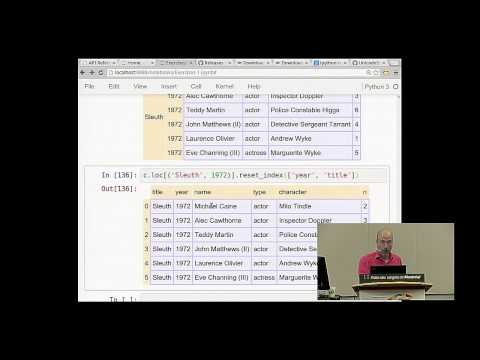

In [289]:
from IPython.display import YouTubeVideo
YouTubeVideo('5JnMutdy6Fw')

Hier ist das Übungsblatt zu diesem Notebook: [**06 - Übungsaufgaben Erstes Data Wrangling mit Pandas**](06_uebungsaufgaben_erstes_data_wrangling_mit_pandas.ipynb)


---

Wahlpflichtach Künstliche Intelligenz I: Praktikum